<a href="https://colab.research.google.com/github/Jarnoesse/IA-AGN-with-ML/blob/main/Dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
 
from astropy.table import Table
from astropy.coordinates import SkyCoord
import astropy.units as u
 
import seaborn as sns
import missingno as msno


In [ ]:
table_RACS_catalogue_URL = 'http://oal.ul.pt/data/AlmaQA2/Catalogs_cV1ax509ZbXXx978pb3/RACS_VEXAS_ALLWISE_DES_PS1_SkyMapper_specZ_milliquas_v3.fits.gz'
table_RACS_cat = Table.read(table_RACS_catalogue_URL)

table_RACS_cat_df = table_RACS_cat.to_pandas() # convert to Pandas Dataframe

In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES","z_spec_1","spec_class_1"]
DES_df = table_RACS_cat_df[attributes].copy()
DES_2_df = DES_df

attributes = ["GPETMAG_PS","RPETMAG_PS","IPETMAG_PS","ZPETMAG_PS","YPETMAG_PS","z_spec_2","class_2_2"]
PS_df = table_RACS_cat_df[attributes].copy()

attributes = ["U_PETRO_SM","V_PETRO_SM","G_PETRO_SM","R_PETRO_SM","I_PETRO_SM","Z_PETRO_SM","z_spec_3","spec_class_3"]
SM_df = table_RACS_cat_df[attributes].copy()

In [ ]:
DES_df  = DES_df[DES_df["spec_class_1"]>=0]

PS_df = PS_df[PS_df["class_2_2"]>=0]


SM_df = SM_df[SM_df["U_PETRO_SM"] >= 0]
SM_df = SM_df[SM_df["z_spec_3"] >= 0]


In [ ]:
DES_df.info(null_counts=True, verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12157 entries, 2 to 259245
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MAG_AUTO_G_DES  12157 non-null  float32
 1   MAG_AUTO_R_DES  12157 non-null  float32
 2   MAG_AUTO_I_DES  12157 non-null  float32
 3   MAG_AUTO_Z_DES  12157 non-null  float32
 4   MAG_AUTO_Y_DES  12157 non-null  float32
 5   z_spec_1        12157 non-null  float64
 6   spec_class_1    12157 non-null  Int16  
dtypes: Int16(1), float32(5), float64(1)
memory usage: 463.0 KB


In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]

color_wheel = {0: "#0392cf", #blue Star
               1: "#7bc043", #green AGN
               2: "#ee4035"} #red Galaxy

colors = DES_df["spec_class_1"].map(lambda x: color_wheel.get(x))

In [ ]:
DES_df['spec_class_1'].value_counts()

2    11048
1     1038
0       71
Name: spec_class_1, dtype: Int64

###FACTOR ANALYSIS ALGORYTHM

In [ ]:
from sklearn.decomposition import FactorAnalysis

In [ ]:
transformer = FactorAnalysis(n_components = 7, random_state = 0)
transformed = transformer.fit_transform(DES_df[attributes].values)

In [ ]:
transformed.shape

(12157, 5)

In [ ]:
DES_df[attributes].values.shape

(12157, 5)

In [ ]:
attributes = ["x","y","","","",]
df = pd.DataFrame(columns=attributes,data=transformed)

In [ ]:
 attributes = ["x","y"]
 df1 = df[attributes]

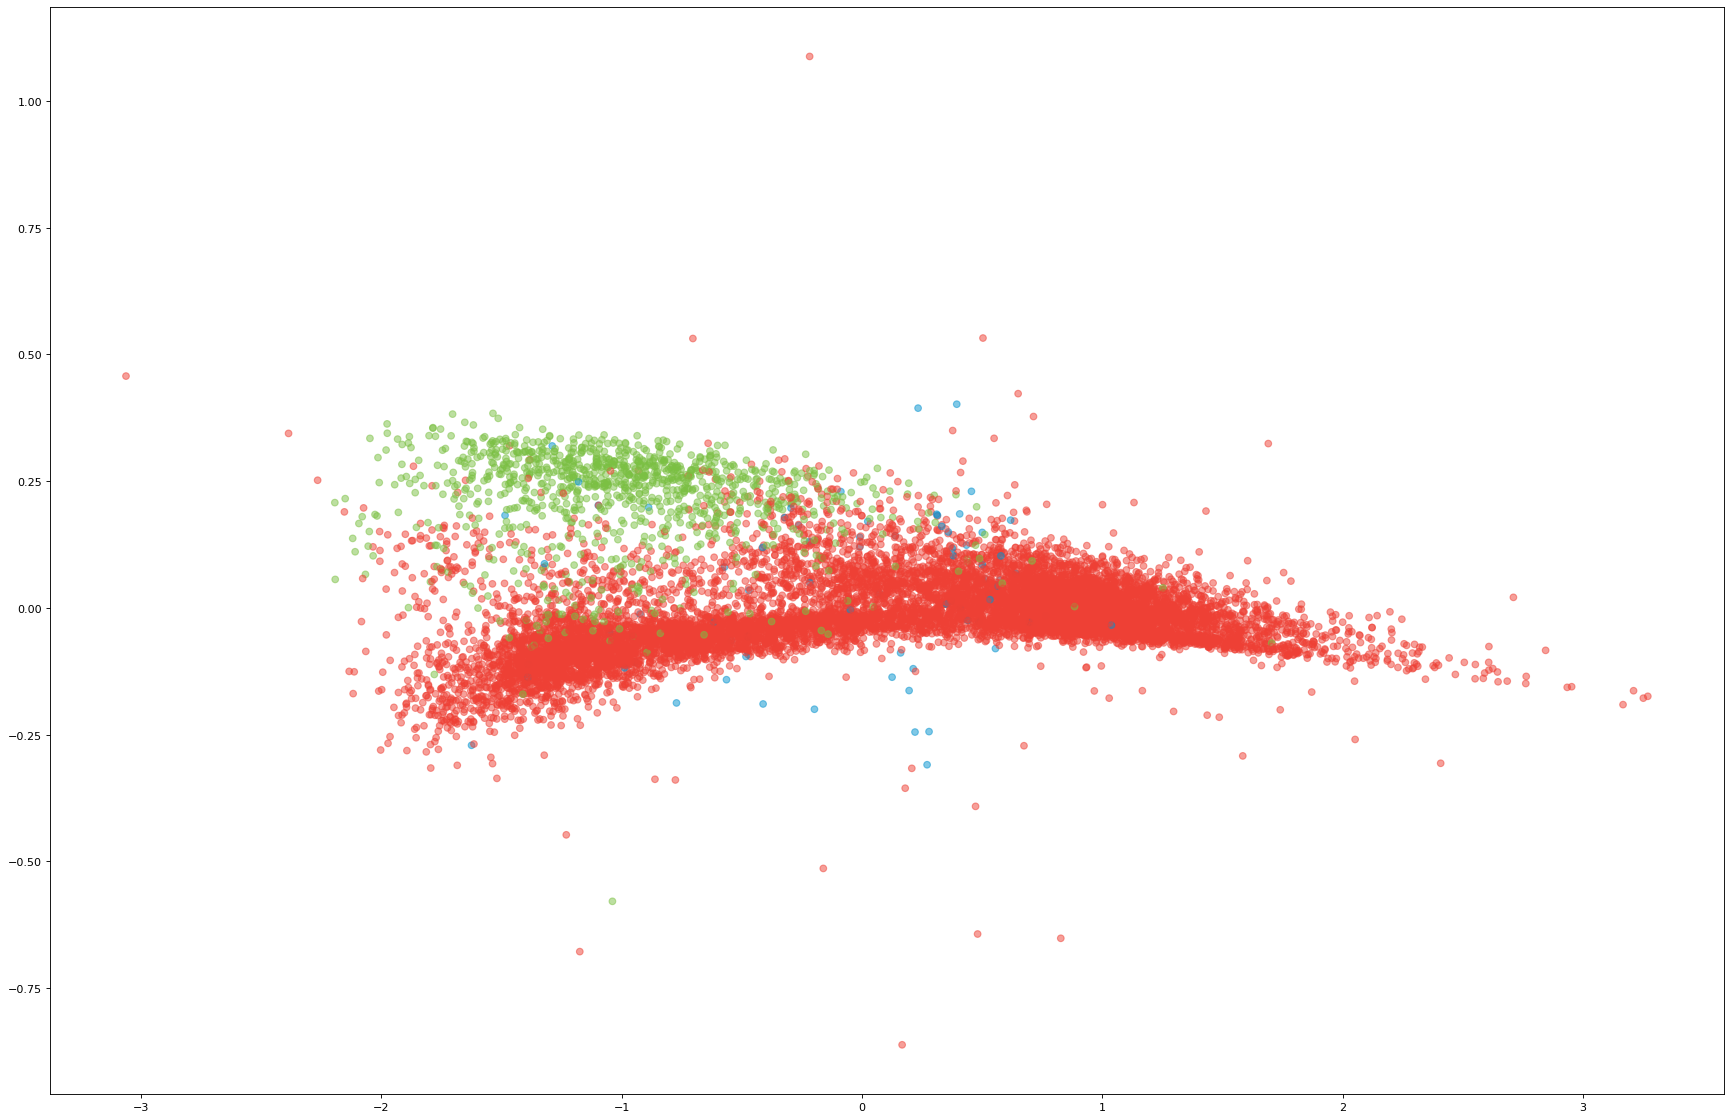

In [ ]:
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df1["x"],df1["y"],c=colors,alpha = 0.5)


In [ ]:
from sklearn.decomposition import KernelPCA

In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]
transformer = KernelPCA(n_components = 2, kernel='linear')
transformed = transformer.fit_transform(DES_df[attributes].values)


In [ ]:
attributes = ["x","y"]
df = pd.DataFrame(columns=attributes,data=transformed) 
attributes = ["x","y"]
df2 = df[attributes]

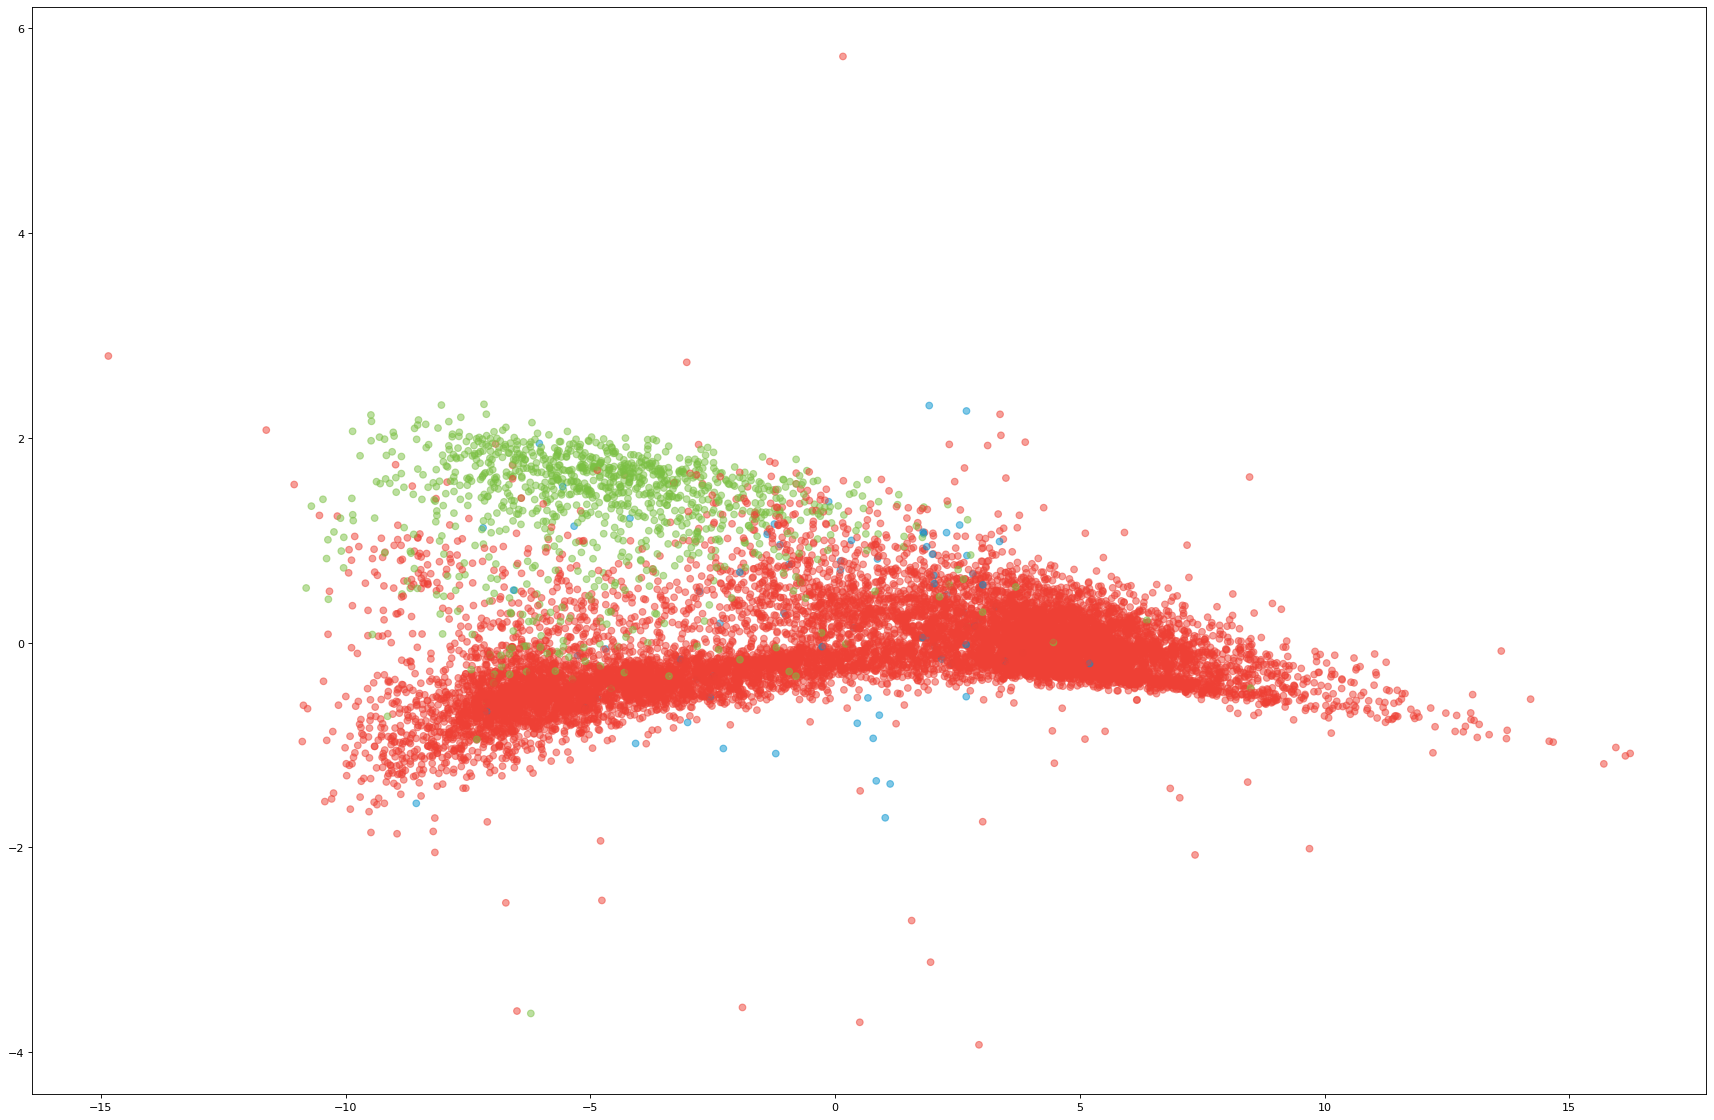

In [ ]:
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df2["x"],df2["y"],c=colors,alpha = 0.5)


ISOMAP

In [ ]:
from sklearn.manifold import Isomap

In [ ]:
attributes = ["MAG_AUTO_G_DES","MAG_AUTO_R_DES","MAG_AUTO_I_DES","MAG_AUTO_Z_DES","MAG_AUTO_Y_DES"]
transformer = Isomap(n_components = 2)
transformed = transformer.fit_transform(DES_df[attributes].values)


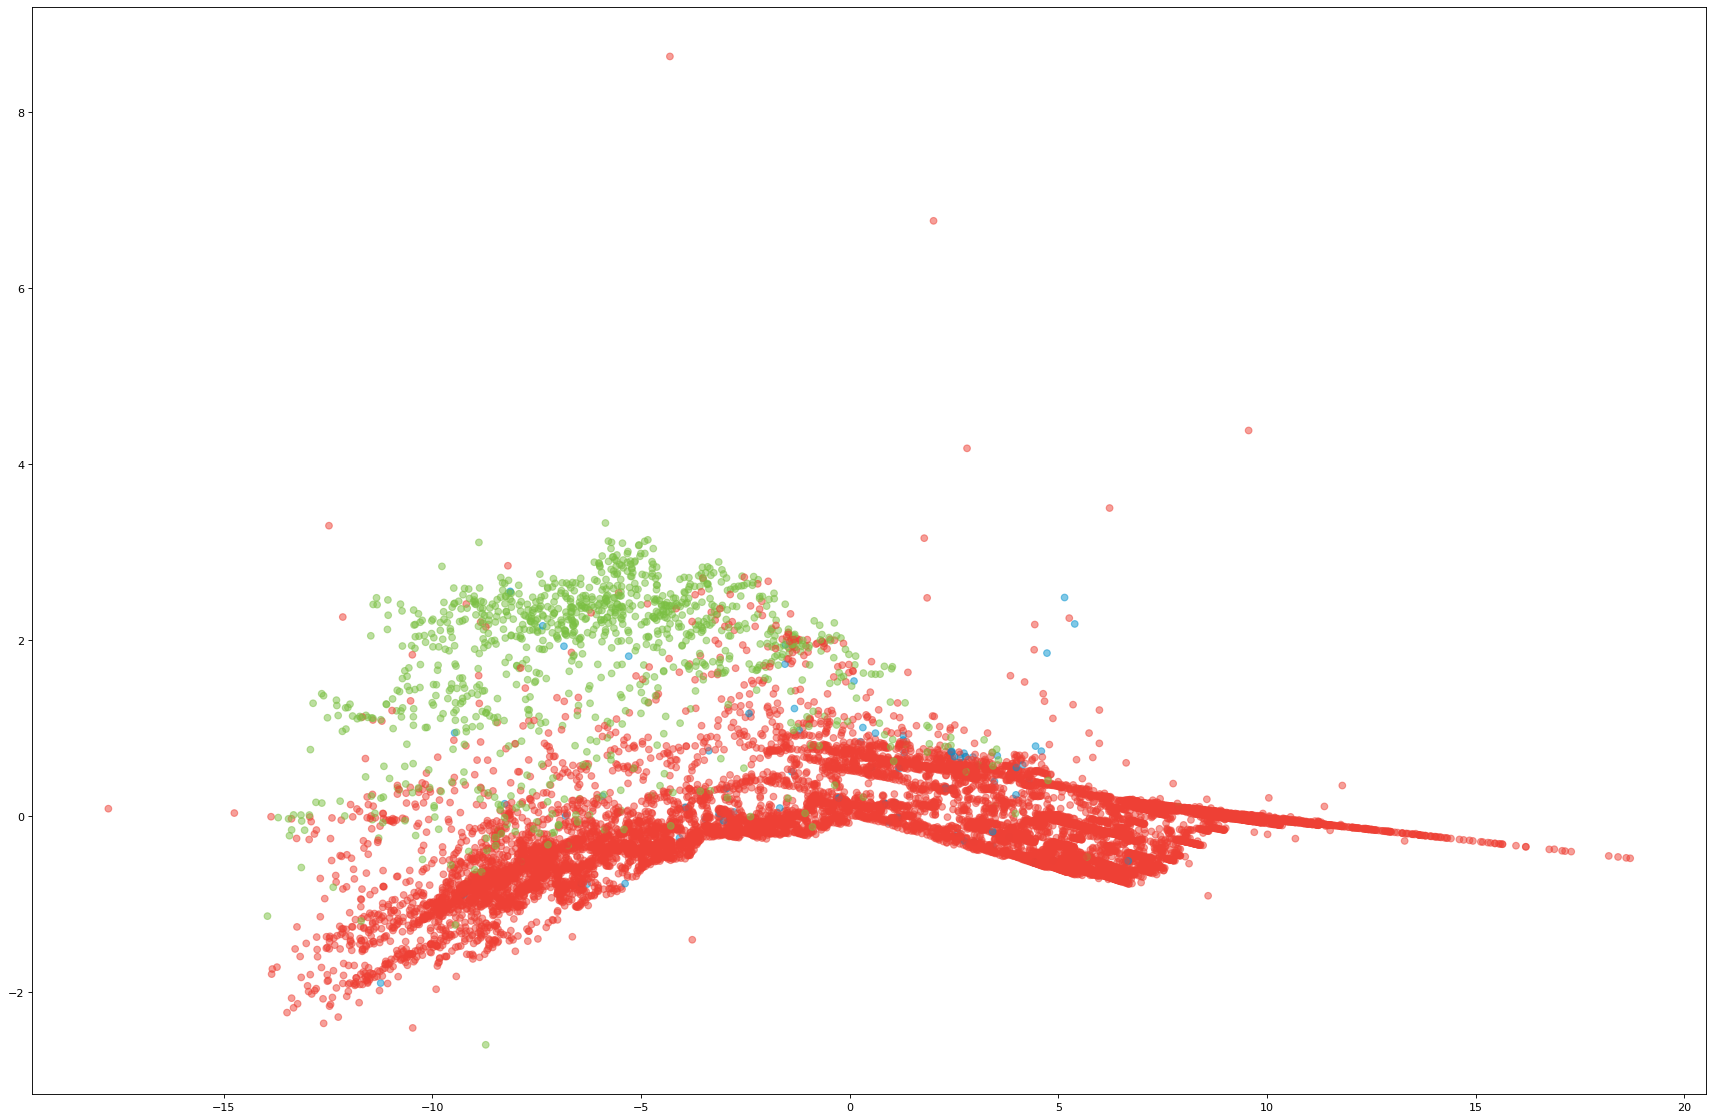

In [ ]:
attributes = ["x","y"]
df = pd.DataFrame(columns=attributes,data=transformed) 
attributes = ["x","y"]
df3 = df[attributes]
plt.figure(figsize=(27, 18), dpi=80)
plt.scatter(df3["x"],df3["y"],c=colors,alpha = 0.5)


Random forest testing


In [ ]:
from sklearn.ensemble import RandomForestClassifier  #importing random classifier
from sklearn.metrics import confusion_matrix

In [ ]:
train_x = df1.iloc[1201:,:].to_numpy()
train_y = DES_df.spec_class_1.iloc[1201:].to_numpy().astype("int")                              #splitting test and train data from the first dataset with the first dimension reduction applied

test_x = df1.iloc[:1200,:].to_numpy()
test_y = DES_df.spec_class_1.iloc[:1200].to_numpy().astype("int")


In [ ]:
DES_df.spec_class_1.iloc[:1200].value_counts()

2    1150
1      41
0       9
Name: spec_class_1, dtype: Int64

In [ ]:
test_x #visualize my test x to be sure all went well

array([[ 0.68487195,  0.00483126],
       [-0.20078672,  0.26148993],
       [-1.22670414,  0.27159434],
       ...,
       [ 0.31872259,  0.10591754],
       [ 1.45242161,  0.00293609],
       [-0.57963184, -0.03178802]])

In [ ]:
#define model
model = RandomForestClassifier(n_estimators=10,class_weight='balanced_subsample')

In [ ]:
model.fit(train_x,train_y) #fitting the model with the train data

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction = model.predict(test_x) #making the prediction array

In [ ]:
test_x 

array([[ 0.68487195,  0.00483126],
       [-0.20078672,  0.26148993],
       [-1.22670414,  0.27159434],
       ...,
       [ 0.31872259,  0.10591754],
       [ 1.45242161,  0.00293609],
       [-0.57963184, -0.03178802]])

In [ ]:
confusion_matrix(test_y,prediction)

array([[   1,    0,    8],
       [   0,   35,    6],
       [   0,   11, 1139]])

Let's try with the second data reduction algorythm


In [ ]:
train_x = df2.iloc[1201:,:].to_numpy()                              #splitting test and train data from the first dataset with the first dimension reduction applied
test_x = df2.iloc[:1200,:].to_numpy()

In [ ]:
test_x

array([[ 3.4668682e+00,  2.4201704e-02],
       [-6.5534729e-01,  1.5653389e+00],
       [-5.7990894e+00,  1.6507891e+00],
       ...,
       [ 1.7672008e+00,  6.4551121e-01],
       [ 7.3275547e+00, -3.8988611e-03],
       [-2.9949427e+00, -2.2026487e-01]], dtype=float32)

In [ ]:
model.fit(train_x,train_y) #fitting the model with the train data
prediction = model.predict(test_x) #making the prediction array

In [ ]:
confusion_matrix(test_y,prediction)

array([[   1,    0,    8],
       [   0,   34,    7],
       [   1,   10, 1139]])

Third one

In [ ]:
train_x = df3.iloc[1201:,:].to_numpy()                              #splitting test and train data from the first dataset with the first dimension reduction applied
test_x = df3.iloc[:1200,:].to_numpy()

In [ ]:
test_x

array([[ 4.41356079, -0.30369418],
       [-0.60590722,  1.96644315],
       [-7.64983935,  2.2161843 ],
       ...,
       [ 2.40592458,  0.62324026],
       [ 9.06444459,  0.02422342],
       [-3.70851809, -0.04214625]])

In [ ]:
model.fit(train_x,train_y) #fitting the model with the train data
prediction = model.predict(test_x) #making the prediction array

In [ ]:
confusion_matrix(test_y,prediction)

array([[   0,    1,    8],
       [   0,   32,    9],
       [   0,   13, 1137]])